In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
import seaborn as sns

In [0]:
# Encoding Package
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.metrics import classification_report, confusion_matrix

# train test split
from sklearn.model_selection import train_test_split
# upsampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Random forest
from sklearn.ensemble import RandomForestClassifier
# StandardScaler
from sklearn.preprocessing import StandardScaler
# XGBoost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
# upsampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [0]:
from google.colab import files
uploaded = files.upload()

Saving DefaultRecord_Person.csv to DefaultRecord_Person.csv


In [0]:
import io
History = pd.read_csv(io.BytesIO(uploaded['DefaultRecord_History.csv']))    

In [0]:
Person  = pd.read_csv('DefaultRecord_Person.csv')

In [0]:
History  = pd.read_csv('DefaultRecord_History.csv')

# Exploratory Data Analysis

In [0]:
History.head()

,ID,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
Person.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2
1,2,120000,2,2,2,26,-1,2,0,0,0,2
2,3,90000,2,2,2,34,0,0,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0


Check for incomplete data - Person

In [0]:
# Present missing value
missing_data_P = pd.DataFrame({'total_missing': Person.isnull().sum(), 
                             'perc_missing': (Person.isnull().sum()/len(Person)*100)})
missing_data_P

,total_missing,perc_missing
ID,0,0.0
LIMIT_BAL,0,0.0
SEX,0,0.0
EDUCATION,0,0.0
MARRIAGE,0,0.0
AGE,0,0.0
PAY_0,0,0.0
PAY_2,0,0.0
PAY_3,0,0.0
PAY_4,0,0.0


In [0]:
# check missing data in history
missing_data_H = pd.DataFrame({'total_missing': History.isnull().sum(), 
                             'perc_missing': (History.isnull().sum()/len(History)*100)})
missing_data_H

,total_missing,perc_missing
ID,0,0.0
BILL_AMT1,0,0.0
BILL_AMT2,0,0.0
BILL_AMT3,0,0.0
BILL_AMT4,0,0.0
BILL_AMT5,0,0.0
BILL_AMT6,0,0.0
PAY_AMT1,0,0.0
PAY_AMT2,0,0.0
PAY_AMT3,0,0.0


In [0]:
# Let's merge the dataset person.index = history.index
Df = Person.merge(History, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

In [0]:
Df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
# Let's drop the id here
Df = Df.drop(["ID"], axis = 1)

In [0]:
# Also PAY_0 should be PAY_1
Df.rename(columns={'PAY_0':"PAY_1"},inplace=True)

In [0]:
# Let's check - it seems right
Df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Data Visualization on variables**

In [0]:
# Perform EDA on Sex, Education, Marriage, Age
# Sex male = 1, female = 2

In [0]:
Df['SEX'].value_counts(normalize=True)
# Interesting, female like shopping?

2    0.603733
1    0.396267
Name: SEX, dtype: float64

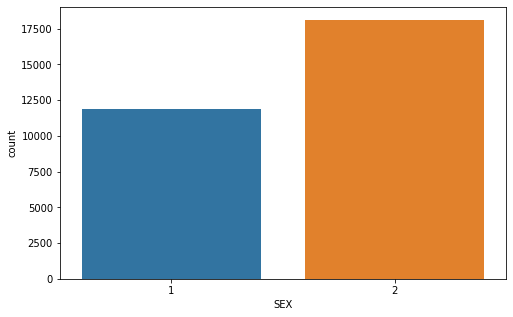

In [0]:
sns.countplot(x='SEX', data=Df)

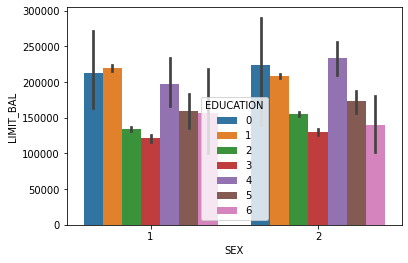

In [0]:
# male credit card holders have less balance than female credit card holders
sns.barplot(x='SEX',y='LIMIT_BAL',data=Df, hue = "EDUCATION")

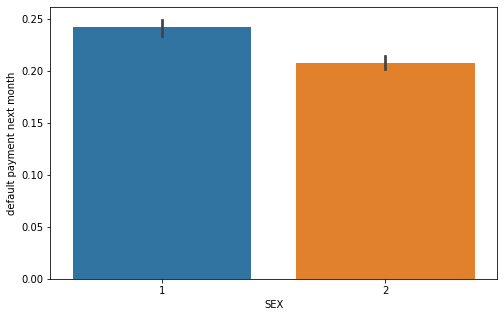

In [0]:
# male are more likely to default?
sns.barplot(x="SEX",y='default payment next month',data=Df)

In [0]:
# Education
# 1 = graduate school, 2 = univeristy, 3 = high school, 4 = others
Df['EDUCATION'].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [0]:
# 1 is married, 2 is single and 3 is other. I will merge 0 and 3 to 3
Df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [0]:
Df['MARRIAGE'] = np.where(Df['MARRIAGE'] == 0, 3, Df['MARRIAGE'])

# **Data Preprocessing**

In [0]:
#merging levels of education
Df['EDUCATION']=np.where(Df['EDUCATION'] == 0, 4, Df['EDUCATION'])
Df['EDUCATION']=np.where(Df['EDUCATION'] == 5, 4, Df['EDUCATION'])
Df['EDUCATION']=np.where(Df['EDUCATION'] == 6, 4, Df['EDUCATION'])

In [0]:
# now it looks ok 
Df['EDUCATION'].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
4    0.015600
Name: EDUCATION, dtype: float64

In [0]:
# Let's start -- Need to have a look for Scaling
Scaling = StandardScaler()
X = Df.drop(['default payment next month'], axis = 1)
X = Scaling.fit_transform(X)

In [0]:
y = Df['default payment next month']

In [0]:
# using one classifier Xgboost
classifier = xgboost.XGBClassifier()

In [0]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [0]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [0]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [0]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# now we have the best params and the best estimator, let's build on this
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.1,
 'learning_rate': 0.25,
 'max_depth': 3,
 'min_child_weight': 3}

In [0]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# use train test split to check on this new classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [0]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [0]:
score

array([0.80433333, 0.808     , 0.81333333, 0.80633333, 0.81733333,
       0.82966667, 0.83666667, 0.82966667, 0.825     , 0.82466667])

In [0]:
score.mean()

0.8195

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(classifier, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

In [0]:
conf_mat

array([[22179,  1185],
       [ 4230,  2406]])

In [0]:
# Precision is TP/(TP + FP), for predicting default, all model prediction has 67% of accounts trully default
# Recall is TP/(TP + FN), out of all the people who will default, what percentage of them you predicted successfully
# Might Require domain knowledge to determine Type 1 error, Type 2 error
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     23364
           1       0.67      0.36      0.47      6636

    accuracy                           0.82     30000
   macro avg       0.75      0.66      0.68     30000
weighted avg       0.80      0.82      0.80     30000



In [0]:
# In this case, Type 1 error is, predict someone who will default but they would not. Given the current scenarios, since the loan is 
# already given, there is nothing much to do about it. But for future loan granding, if we care about Type 1 error, we might loss marginal revenue

In [0]:
# Type 2 error here are people who will default but we predict him/her will not default and grand him/her the loan. In this case, for future loan lending
# the writeoff/chargeback could be huge.

In [0]:
# Depends on the parties, banks might be more averse of loss and lost of funds, they would focus more on Type 2 error to ensure they do not need to worry much about the 
# chargeback/writeoff

# **Trying Upsampling with Random Forrest**

In [0]:
X = Df.drop(['default payment next month'], axis=1)

In [0]:
X = Scaling.fit_transform(X)

In [0]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500)

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc.pred = rfc.predict(X_test)

In [18]:
# This is the model used without up-sampling
print(confusion_matrix(y_test,rfc.pred))
print(classification_report(y_test,rfc.pred)) 

[[4425  271]
 [ 798  506]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4696
           1       0.65      0.39      0.49      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000



Using Up-sampling

In [0]:
# Implementing Oversampling for handling imbalanced
smk = SMOTETomek(random_state = 42)
nm = NearMiss(random_state = 1)

In [0]:
X_res, y_res = smk.fit_sample(X_train, y_train)

In [23]:
from collections import Counter
print( Counter(y_res))

Counter({0: 18196, 1: 18196})


In [0]:
rfc.fit(X_res, y_res)
rfc.pred = rfc.predict(X_test)

In [25]:
print(confusion_matrix(y_test,rfc.pred))
print(classification_report(y_test,rfc.pred))

[[4178  518]
 [ 646  658]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4696
           1       0.56      0.50      0.53      1304

    accuracy                           0.81      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.80      0.81      0.80      6000

